In [75]:
# SO basically SVM works by mapping data to a high-dimensional feature space so that data points
# can be categorized even when the data are not linearly separable (this gets done by kernel function of SVM classifier).
#  A separator between the categories is found, then the data is transformed in such a way
# that the separator could be drawn as a hyper plane.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()  # print me the first five
cell_df.shape  # in rows, columns
cell_df.size  # in bytes
cell_df.count()
cell_df["Class"]
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<Axes: xlabel='Clump', ylabel='UnifSize'>

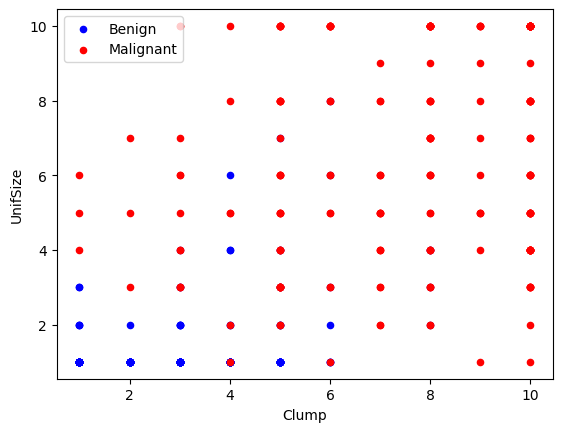

In [78]:
# we are going to chhose those rows which belong to the malignant dataframe only
malignant_df = cell_df[cell_df["Class"] == 4][0:200]
beningn_df = cell_df[cell_df["Class"] == 2][0:200]

# help(beningn_df.plot)
axes = beningn_df.plot(
    kind="scatter", x="Clump", y="UnifSize", color="blue", label="Benign"
)

malignant_df.plot(
    kind="scatter", x="Clump", y="UnifSize", color="red", label="Malignant", ax=axes
)


# beningn_df.plot(kind="scatter", x="Clump", y="UnifSize", color="green", label="Benign")

In [79]:
# Identifying unwanted rows
cell_df.dtypes
# We need to remove non numeric data
# First we will convert it to numeric, the BareNuc
cell_df = cell_df[pd.to_numeric(cell_df["BareNuc"], errors="coerce").notnull()]
cell_df["BareNuc"] = cell_df["BareNuc"].astype("int")
cell_df.columns


feature_df = cell_df[
    [
        "Clump",
        "UnifSize",
        "UnifShape",
        "MargAdh",
        "SingEpiSize",
        "BareNuc",
        "BlandChrom",
        "NormNucl",
        "Mit",
    ]
]

# Next, we convert this data to numpy array
# cell_df 100 rows and 11 columns
# Picked 9 columns out of 11.

# independent variable
x = np.asarray(feature_df)

# dependent variable
y = np.array(cell_df["Class"])

y[0:5]

array([2, 2, 2, 2, 2])

In [80]:
# dicide the data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


In [81]:
# Modelling (SVM with scikitlearn)
# The svm algorithm offers a choice of kernekl functions for performing its processing. Basically mapping data into a higher dimensionoal space is called kernelling. The mathematical function used for the transformatiion is known as the kernel functiion and can be ofn different types, such as: 
# 1. Linear
# 2. Polynomial
# 3. Radial Basis Function (RBF)
# 4. Sigmol

# Each of these functiions has its characteristics, its pros and cons, and its equation, but there's no easy way of knowing which function performs best with any given dataset, we usualy choose different functions inn turn and compare the results. Let us just use the default, the RBF(Radius and Basis Function) for this lab.

In [82]:
from sklearn import svm

classifier=svm.SVC(kernel="linear", gamma="auto", C=2)
# The C denotes the penalty that we impose on the learnning model  when it incorrrectly identifies a point. herer it is 2 units of penalty 2 * no of wrongly identified points

classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

In [83]:
# Evaluating our model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

